In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import autoviz
import plotly.express as px







In [7]:

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

In [8]:
# Define column headers
column_headers = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"]

# Load data into a Pandas DataFrame (replace with your data loading method)
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, names=column_headers)



In [9]:
#remove fnlwgt values

data.drop("fnlwgt", axis=1, inplace=True)


In [10]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [11]:
data.head(20)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [12]:

age_distribution = data['age'].value_counts().reset_index()
age_distribution.columns = ['Age', 'Count']

fig = px.bar(age_distribution, x='Age', y='Count', title='Age Distribution')
fig.show()

In [13]:
age_distribution = data['education-num'].value_counts().reset_index()
age_distribution.columns = ['Education-Num', 'Count']

fig = px.bar(age_distribution, x='Education-Num', y='Count', title='Education-Num')
fig.show()

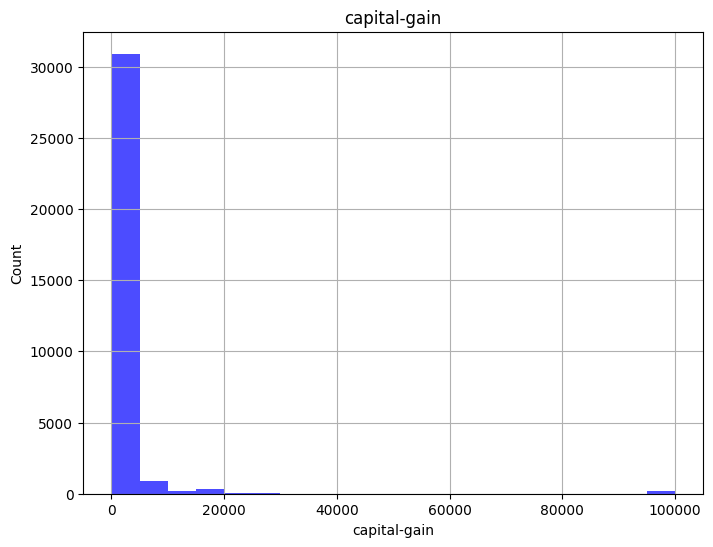

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(data['capital-gain'], bins=20, color='blue', alpha=0.7)
plt.title(f'capital-gain')
plt.xlabel('capital-gain')
plt.ylabel('Count')
plt.grid(True)

plt.show()




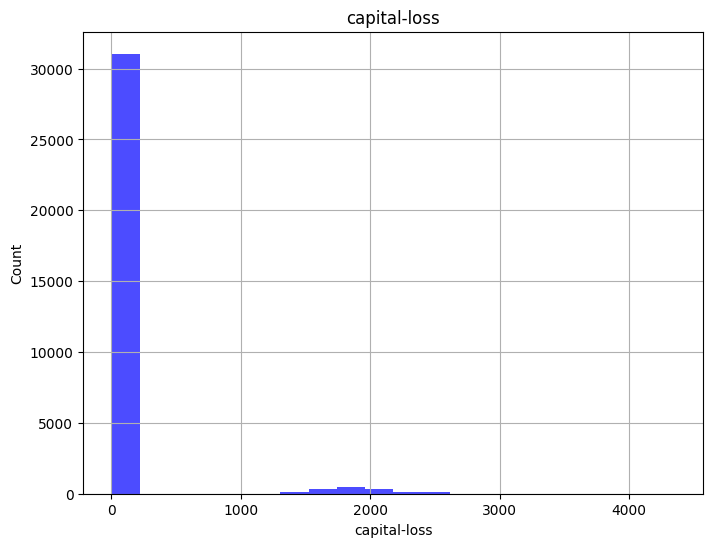

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(data['capital-loss'], bins=20, color='blue', alpha=0.7)
plt.title(f'capital-loss')
plt.xlabel('capital-loss')
plt.ylabel('Count')
plt.grid(True)

plt.show()


In [16]:

age_distribution = data['hours-per-week'].value_counts().reset_index()
age_distribution.columns = ['DS_hours-per-week', 'Count']

fig = px.bar(age_distribution, x='DS_hours-per-week', y='Count', title='Hours-per-week')
fig.show()

In [17]:
chart = categorical_histogram(data, *['marital-status'], **{})
chart

In [18]:
chart = categorical_histogram(data, *['workclass'], **{})
chart

In [19]:
chart = categorical_histogram(data, *['occupation'], **{})
chart

In [20]:
chart = categorical_histogram(data, *['relationship'], **{})
chart

In [21]:

chart = categorical_histogram(data, *['race'], **{})
chart

In [22]:

chart = categorical_histogram(data, *['sex'], **{})
chart

In [23]:

age_distribution = data['native-country'].value_counts().reset_index()
age_distribution.columns = ['native-country', 'Count']

fig = px.bar(age_distribution, x='native-country', y='Count', title='Hours-per-week')
fig.show()

In [24]:
income_distribution = data['salary'].value_counts().reset_index()
income_distribution.columns = ['Income', 'Count']

fig = px.pie(income_distribution, names='Income', values='Count', title='Income Distribution')
fig.show()

In [25]:

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding for categorical columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[non_numeric_columns]).toarray()

# Combine numerical and encoded categorical data
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
numerical_data = data[numerical_columns].values
final_data = np.hstack((numerical_data, encoded_data))








In [26]:
# Parameters for coreset construction
coreset_size = len(final_data)
#kmeans_clusters = len(final_data)//10  # Number of clusters for k-Means coreset construction
kmeans_clusters = 3256;
print("Coreset Size = "+str(coreset_size))
print("kmeans_clusters =  " + str(kmeans_clusters))

# Construct the coreset using k-Means clustering
kmeans = KMeans(n_clusters=kmeans_clusters, random_state=42)
kmeans.fit(final_data)

# Get the cluster centers as the coreset points
coreset_points = kmeans.cluster_centers_




Coreset Size = 32561
kmeans_clusters =  3256


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [27]:
## Select a subset of principal records for downsampling
principal_indices = kmeans.predict(final_data)

# Ensure coreset_size doesn't exceed the number of principal records //Fixed
if coreset_size > len(np.unique(principal_indices)):
    coreset_size = len(np.unique(principal_indices))

downsampled_indices = np.random.choice(np.unique(principal_indices), size=coreset_size, replace=False)

# Create the downsampled dataset using the selected indices
downsampled_data = final_data[downsampled_indices]



In [28]:
# Convert coreset points back to the original categorical values
decoded_categorical_data = encoder.inverse_transform(downsampled_data[:, len(numerical_columns):])

# Combine numerical and decoded categorical data for the final result
final_result = np.hstack((downsampled_data[:, :len(numerical_columns)], decoded_categorical_data))

print("Final result:")
print(final_result)

Final result:
[[37.0 9.0 0.0 ... ' Female' ' United-States' ' <=50K']
 [38.0 9.0 2829.0 ... ' Male' ' Mexico' ' <=50K']
 [42.0 12.0 0.0 ... ' Male' ' United-States' ' >50K']
 ...
 [30.0 10.0 0.0 ... ' Female' ' United-States' ' <=50K']
 [41.0 9.0 0.0 ... ' Male' ' United-States' ' <=50K']
 [41.0 9.0 0.0 ... ' Male' ' United-States' ' <=50K']]


In [29]:
#converting to a dataframe
column_headers = ['DS_age', 'DS_education-num', 'DS_capital-gain', 'DS_capital-loss', 'DS_hours-per-week','DS_workclass', 'DS_education', 'DS_marital-status', 'DS_occupation', 'DS_relationship', 'DS_race','DS_sex','DS_native-country','DS_salary']
df = pd.DataFrame(final_result, columns= column_headers)
df.head(100)


,DS_age,DS_education-num,DS_capital-gain,DS_capital-loss,DS_hours-per-week,DS_workclass,DS_education,DS_marital-status,DS_occupation,DS_relationship,DS_race,DS_sex,DS_native-country,DS_salary
0,37.0,9.0,0.0,0.0,12.0,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
1,38.0,9.0,2829.0,0.0,30.0,Private,HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,Mexico,<=50K
2,42.0,12.0,0.0,0.0,45.0,Private,Assoc-acdm,Married-civ-spouse,Sales,Husband,White,Male,United-States,>50K
3,45.0,11.0,0.0,1564.0,40.0,Private,Assoc-voc,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
4,49.0,6.0,0.0,0.0,40.0,Local-gov,10th,Separated,Other-service,Unmarried,Black,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,47.0,9.0,0.0,0.0,40.0,Private,HS-grad,Divorced,Other-service,Not-in-family,Asian-Pac-Islander,Female,United-States,<=50K
96,71.0,9.0,0.0,0.0,15.0,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
97,51.0,13.0,0.0,0.0,50.0,Private,Bachelors,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Male,United-States,<=50K
98,29.0,10.0,0.0,0.0,40.0,Private,Some-college,Never-married,Craft-repair,Own-child,White,Male,United-States,<=50K


In [30]:
#change collums to match original one

print("Data Types Before Conversion:")
print(df.dtypes)

# Specify the new data types for specific columns
new_data_types = {'DS_age': 'int64', 'DS_education-num': 'int64', 'DS_capital-gain': 'int64', 'DS_capital-loss': 'int64', 'DS_hours-per-week': 'int64' }

# Use .astype() to change the data types
df = df.astype(new_data_types)

# age                int64
# workclass         object
# education         object
# education-num      int64
# marital-status    object
# occupation        object
# relationship      object
# race              object
# sex               object
# capital-gain       int64
# capital-loss       int64
# hours-per-week     int64
# native-country    object
# salary            object

# Display the data types after conversion
print("\nData Types After Conversion:")
print(df.dtypes)

Data Types Before Conversion:
DS_age               object
DS_education-num     object
DS_capital-gain      object
DS_capital-loss      object
DS_hours-per-week    object
DS_workclass         object
DS_education         object
DS_marital-status    object
DS_occupation        object
DS_relationship      object
DS_race              object
DS_sex               object
DS_native-country    object
DS_salary            object
dtype: object

Data Types After Conversion:
DS_age                int64
DS_education-num      int64
DS_capital-gain       int64
DS_capital-loss       int64
DS_hours-per-week     int64
DS_workclass         object
DS_education         object
DS_marital-status    object
DS_occupation        object
DS_relationship      object
DS_race              object
DS_sex               object
DS_native-country    object
DS_salary            object
dtype: object


In [31]:

# Create a bar chart for age distribution
age_distribution = df['DS_age'].value_counts().reset_index()
age_distribution.columns = ['Age', 'Count']

fig = px.bar(age_distribution, x='Age', y='Count', title='Age Distribution Downsampled')
fig.show()

In [32]:
age_distribution = df['DS_education-num'].value_counts().reset_index()
age_distribution.columns = ['Education-Num', 'Count']

fig = px.bar(age_distribution, x='Education-Num', y='Count', title='Education-Num Downsampled')
fig.show()

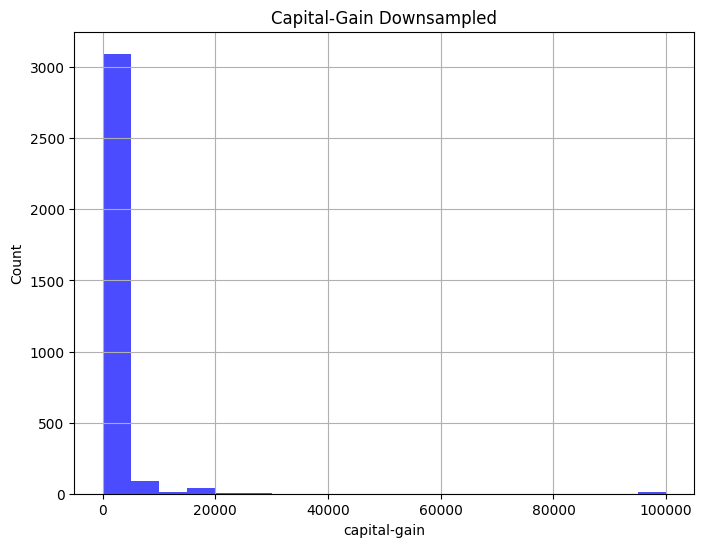

In [33]:
plt.figure(figsize=(8, 6))
plt.hist(df['DS_capital-gain'], bins=20, color='blue', alpha=0.7)
plt.title(f'Capital-Gain Downsampled')
plt.xlabel('capital-gain')
plt.ylabel('Count')
plt.grid(True)

plt.show()


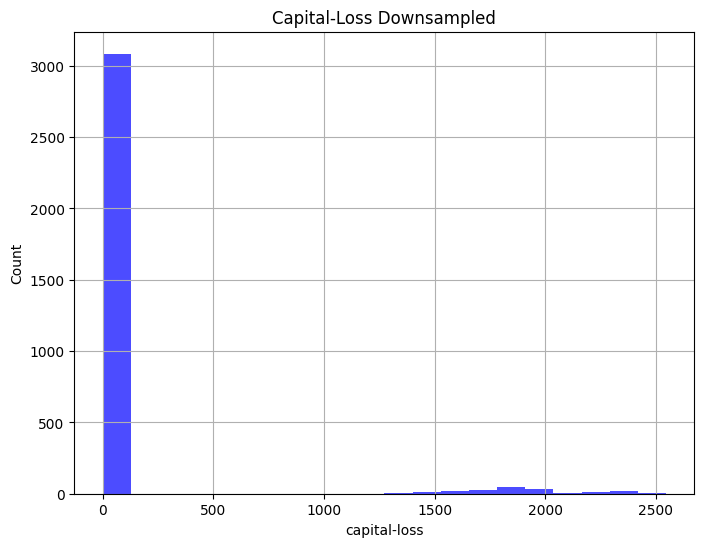

In [34]:
plt.figure(figsize=(8, 6))
plt.hist(df['DS_capital-loss'], bins=20, color='blue', alpha=0.7)
plt.title(f'Capital-Loss Downsampled')
plt.xlabel('capital-loss')
plt.ylabel('Count')
plt.grid(True)

plt.show()

In [35]:
age_distribution = df['DS_hours-per-week'].value_counts().reset_index()
age_distribution.columns = ['DS_hours-per-week', 'Count']

fig = px.bar(age_distribution, x='DS_hours-per-week', y='Count', title='Hours-per-week Downsampled')
fig.show()

In [36]:
chart = categorical_histogram(df, *['DS_marital-status'], **{})
chart

In [37]:
chart = categorical_histogram(df, *['DS_workclass'], **{})
chart

In [38]:
chart = categorical_histogram(df, *['DS_occupation'], **{})
chart

In [39]:
chart = categorical_histogram(df, *['DS_relationship'], **{})
chart

In [40]:

chart = categorical_histogram(df, *['DS_race'], **{})
chart

In [41]:

chart = categorical_histogram(df, *['DS_sex'], **{})
chart

In [42]:

age_distribution = df['DS_native-country'].value_counts().reset_index()
age_distribution.columns = ['native-country', 'Count']

fig = px.bar(age_distribution, x='native-country', y='Count', title='native-country')
fig.show()

In [43]:
# Create a pie chart for income distribution
income_distribution = df['DS_salary'].value_counts().reset_index()
income_distribution.columns = ['Income', 'Count']

fig = px.pie(income_distribution, names='Income', values='Count', title='Income Distribution')
fig.show()

In [44]:
# Write final result to a text file
output_file_path = "output.txt"
with open(output_file_path, "w") as f:
    for row in final_result:
        f.write(" ".join(map(str, row)) + "\n")

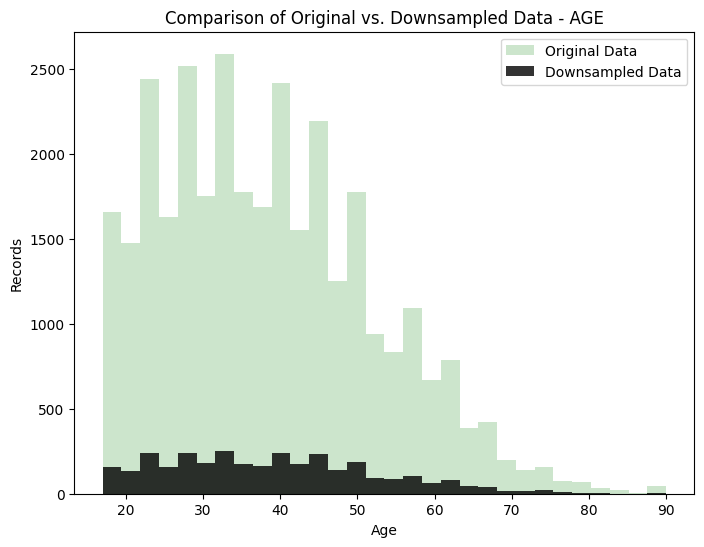

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and axis for the comparison
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histograms for both datasets
ax.hist(data['age'], bins=30, alpha=0.2, label='Original Data', color='green')
ax.hist(df['DS_age'], bins=30, alpha=0.8, label='Downsampled Data', color='black')

# Add labels and a legend
ax.set_xlabel('Age')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - AGE')
ax.legend()

# Display the plot
plt.show()

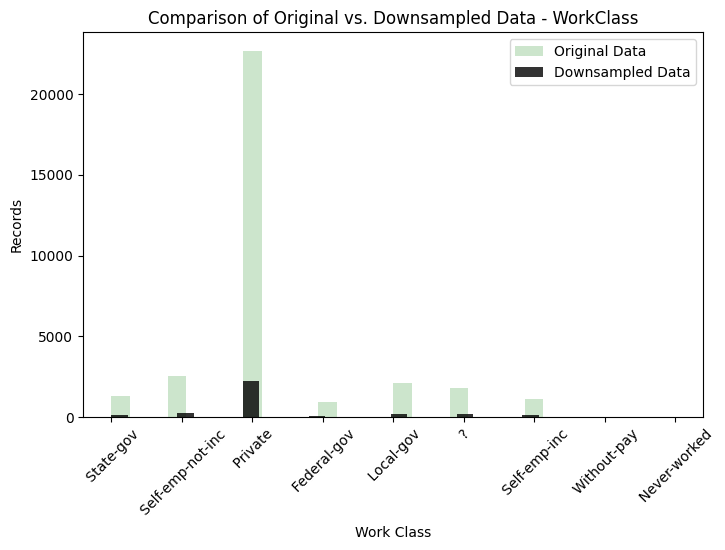

In [46]:
fig, ax = plt.subplots(figsize=(8, 5))
# plt.xticks(rotation='vertical')
plt.xticks(rotation=45)



# Plot histograms for both datasets
ax.hist(data['workclass'], bins=30, alpha=0.2, label='Original Data', color='green')
ax.hist(df['DS_workclass'], bins=30, alpha=0.8, label='Downsampled Data', color='black')

# Add labels and a legend
ax.set_xlabel('Work Class')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - WorkClass')
ax.legend()

# Display the plot
plt.show()

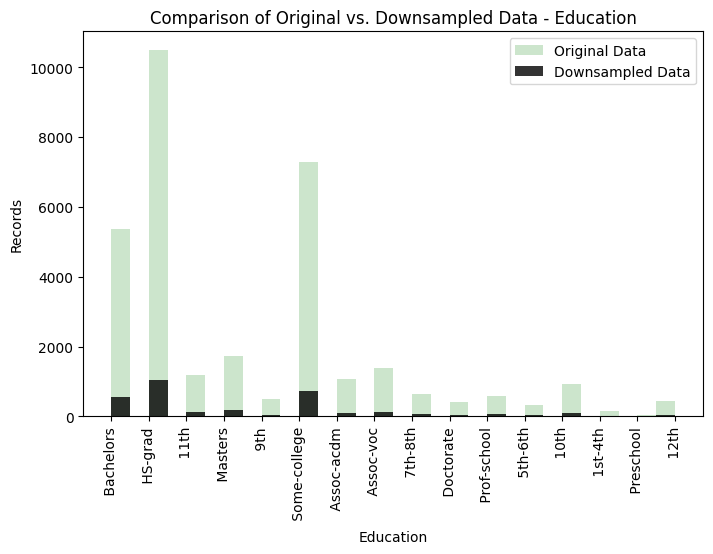

In [47]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.xticks(rotation='vertical')


# Plot histograms for both datasets
ax.hist(data['education'], bins=30, alpha=0.2, label='Original Data', color='green')
ax.hist(df['DS_education'], bins=30, alpha=0.8, label='Downsampled Data', color='black')

# Add labels and a legend
ax.set_xlabel('Education')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Education')
ax.legend()

# Display the plot
plt.show()

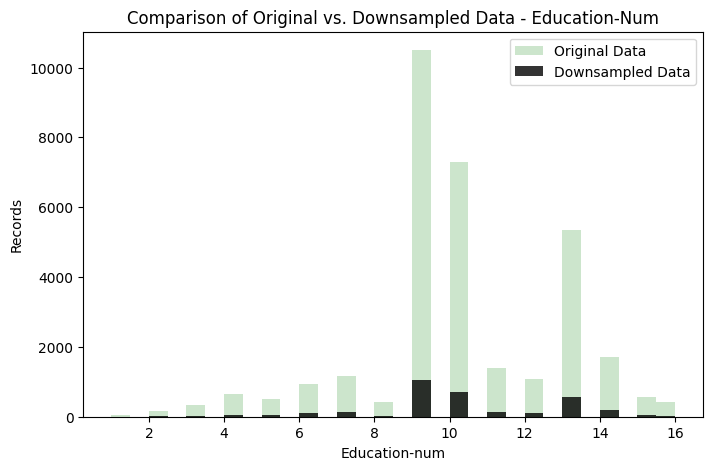

In [48]:
fig, ax = plt.subplots(figsize=(8, 5))


# Plot histograms for both datasets
ax.hist(data['education-num'], bins=30, alpha=0.2, label='Original Data', color='green')
ax.hist(df['DS_education-num'], bins=30, alpha=0.8, label='Downsampled Data', color='black')

# Add labels and a legend
ax.set_xlabel('Education-num')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Education-Num')
ax.legend()

# Display the plot
plt.show()

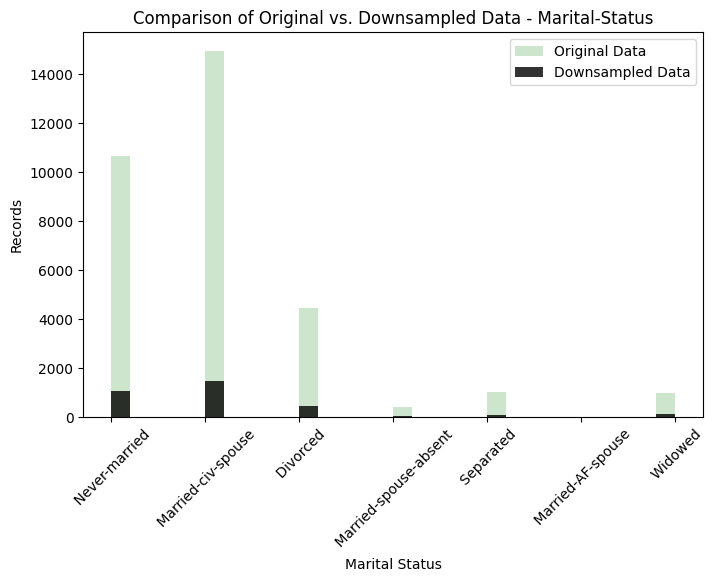

In [49]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.xticks(rotation=45)


# Plot histograms for both datasets
ax.hist(data['marital-status'], bins=30, alpha=0.2, label='Original Data', color='green')
ax.hist(df['DS_marital-status'], bins=30, alpha=0.8, label='Downsampled Data', color='black')

# Add labels and a legend
ax.set_xlabel('Marital Status')
ax.set_ylabel('Records')
ax.set_title('Comparison of Original vs. Downsampled Data - Marital-Status')
ax.legend()



# Display the plot
plt.show()



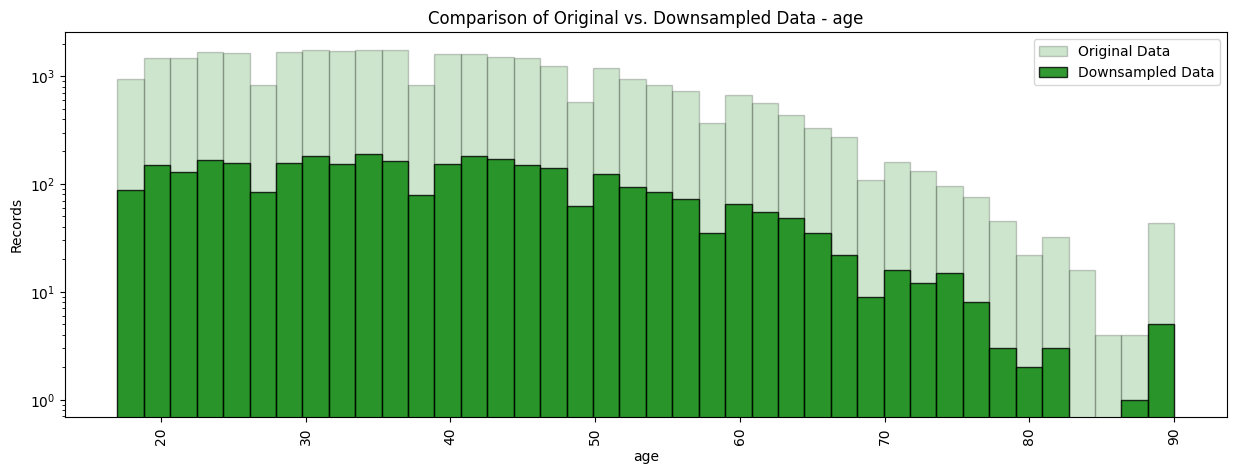

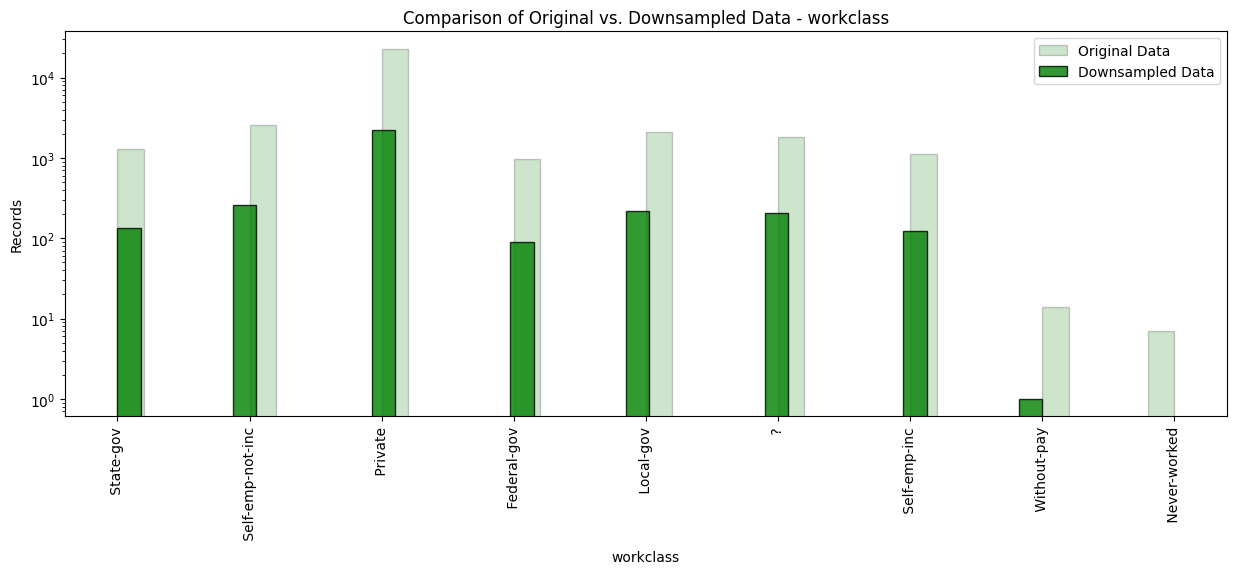

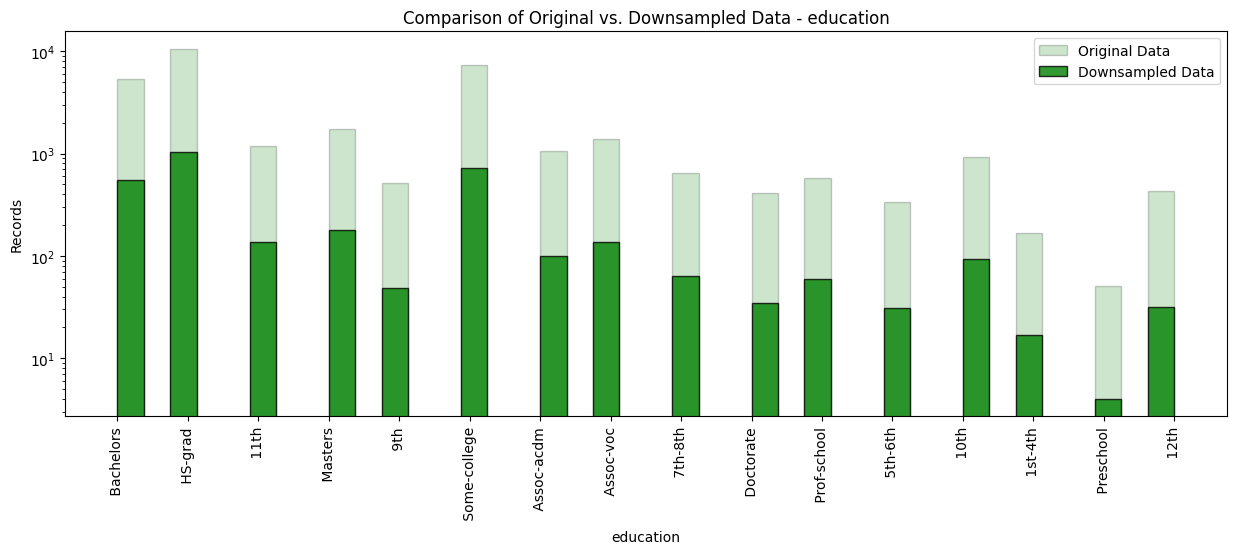

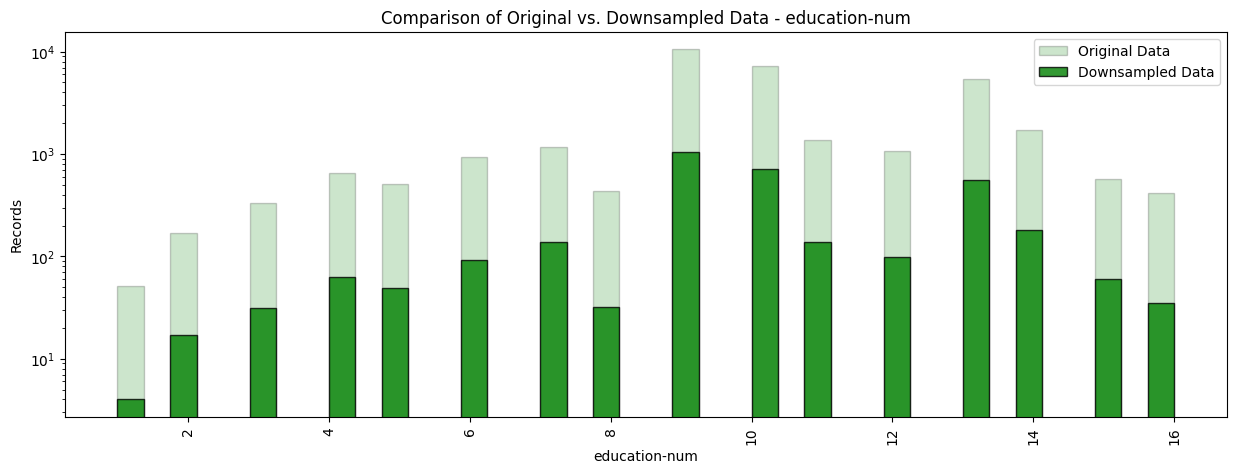

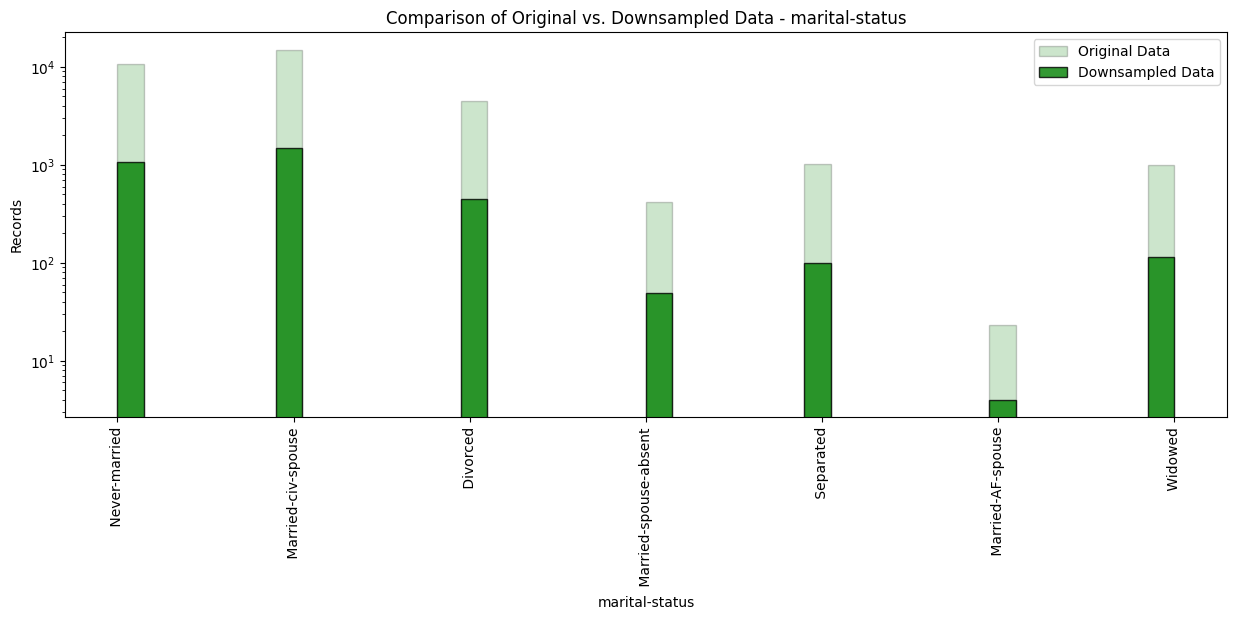

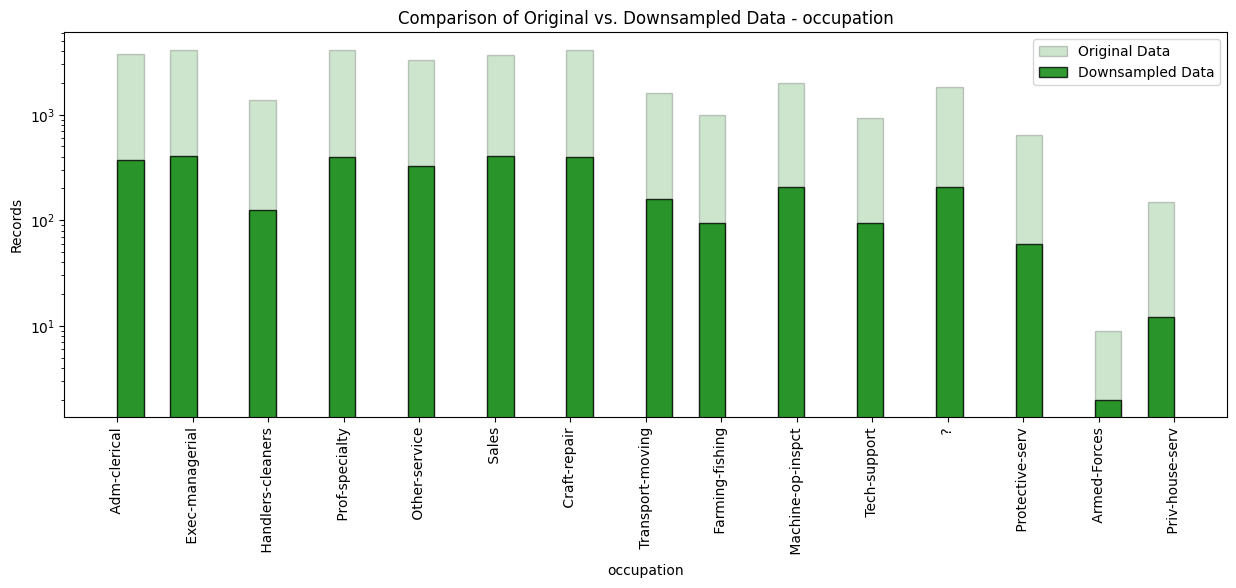

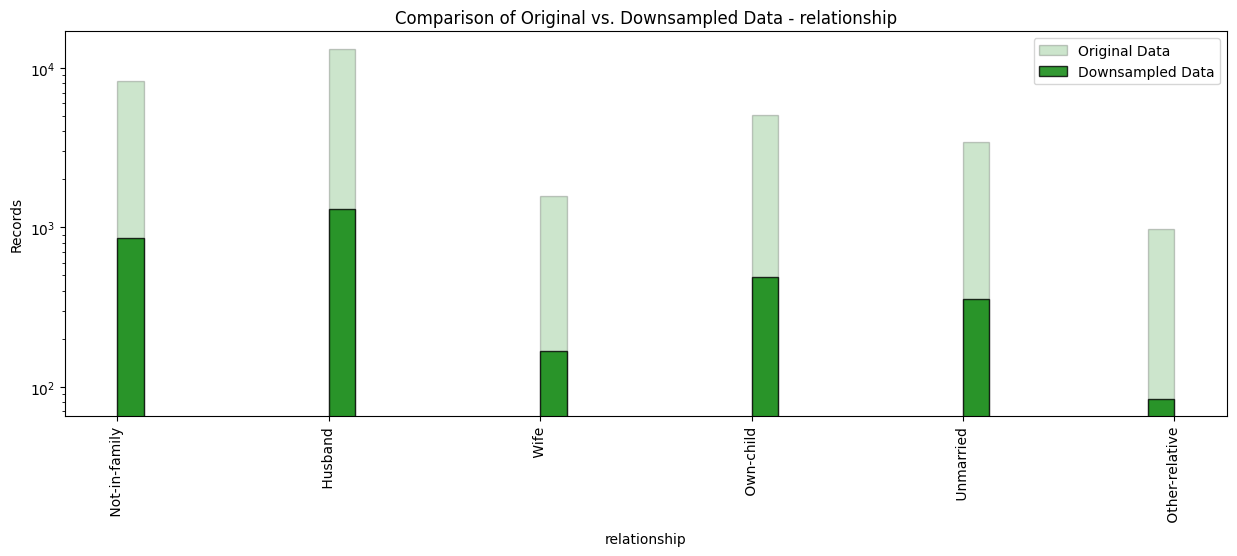

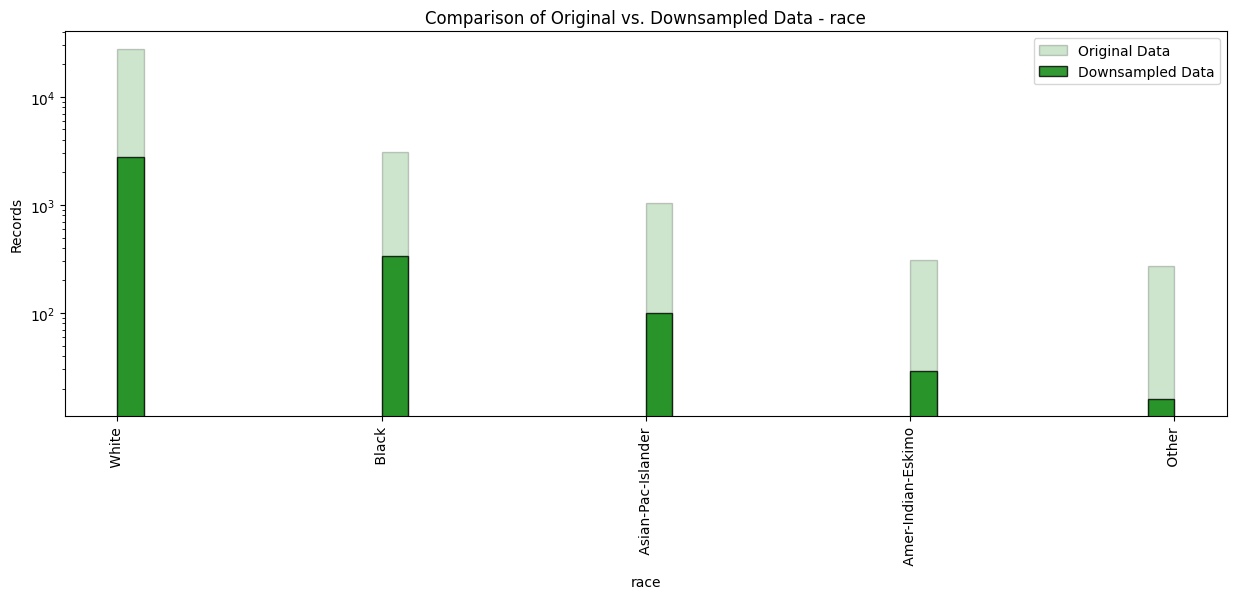

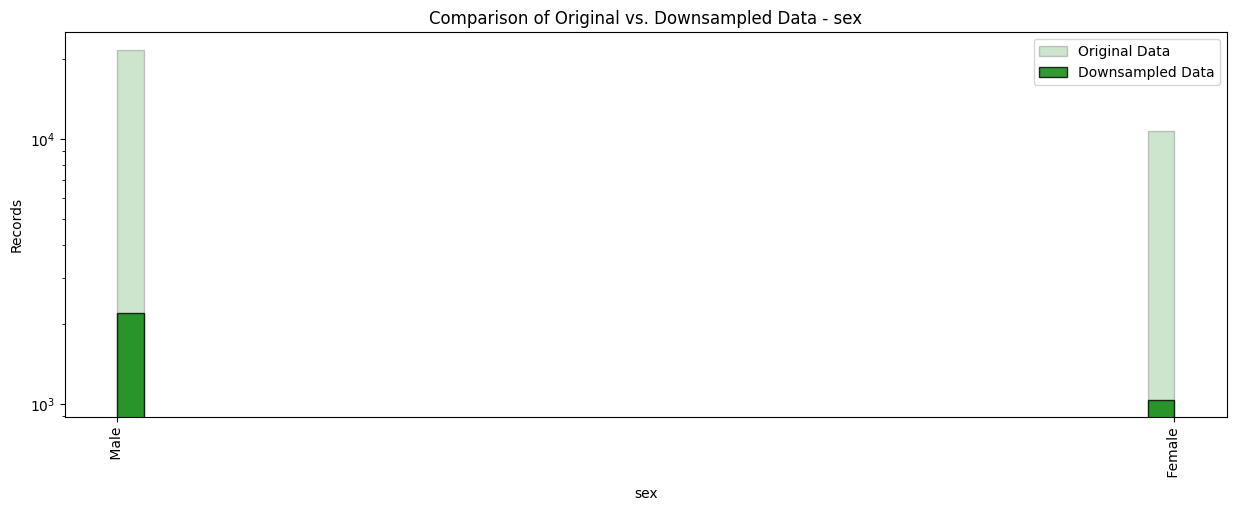

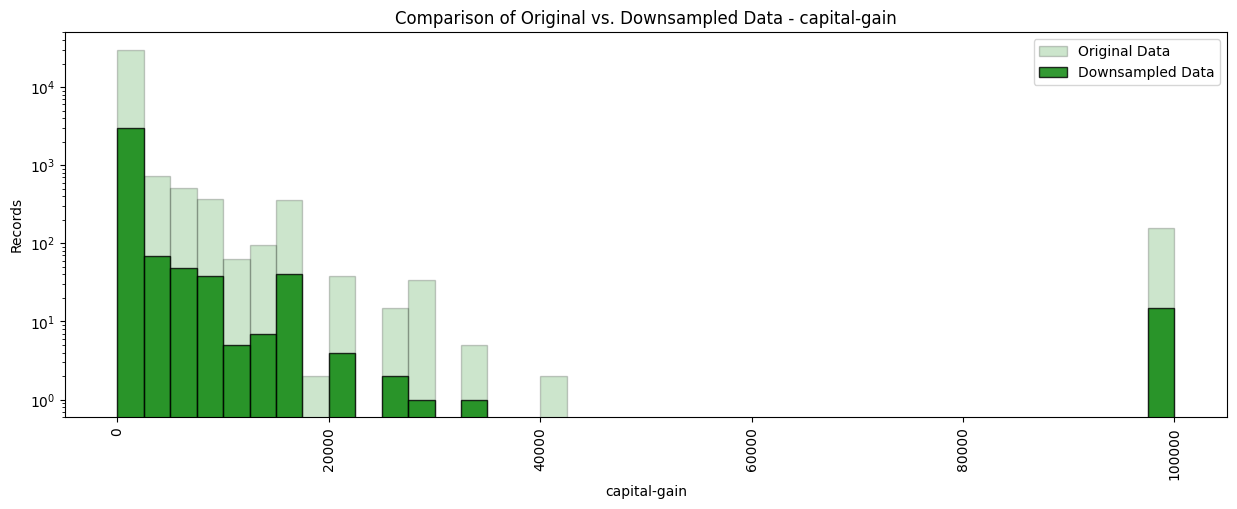

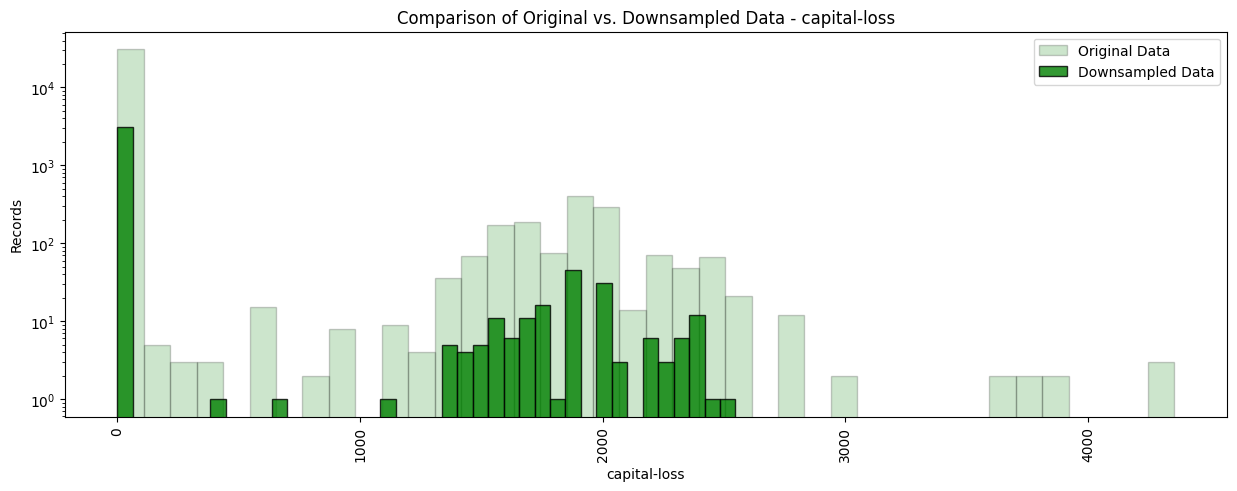

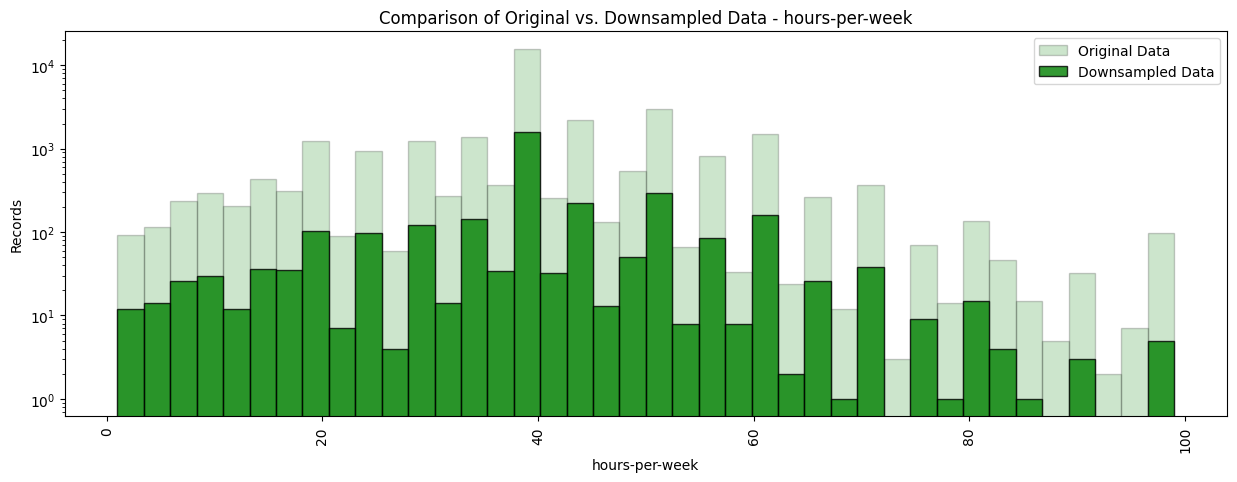

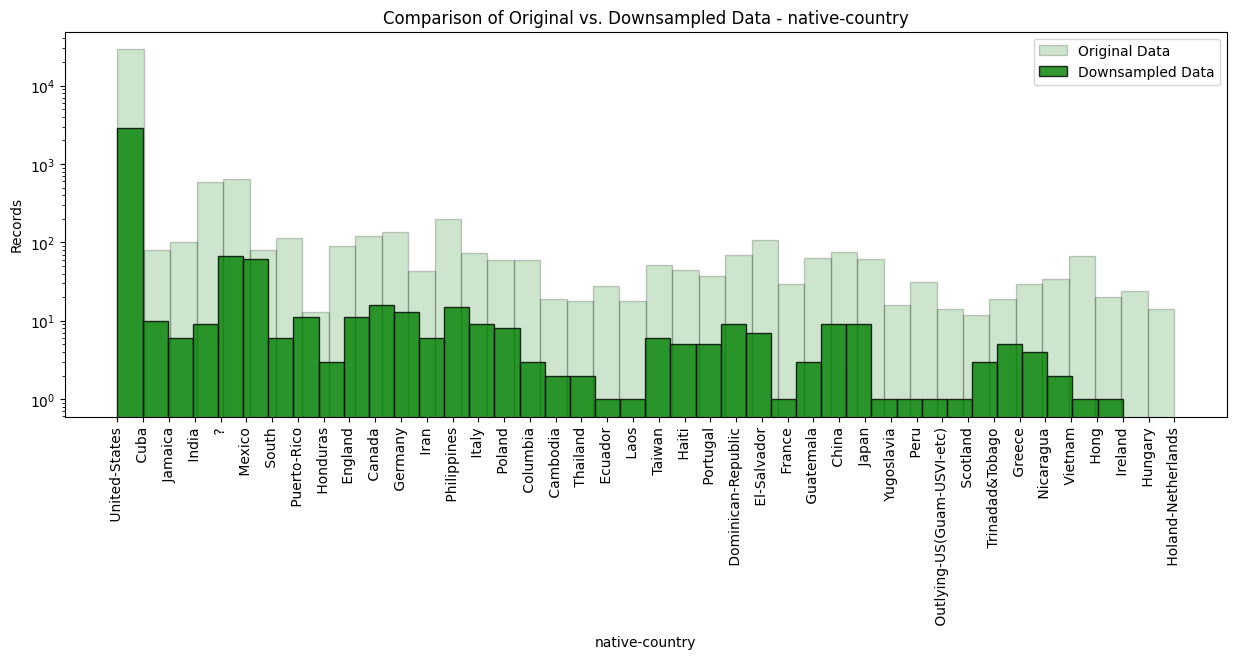

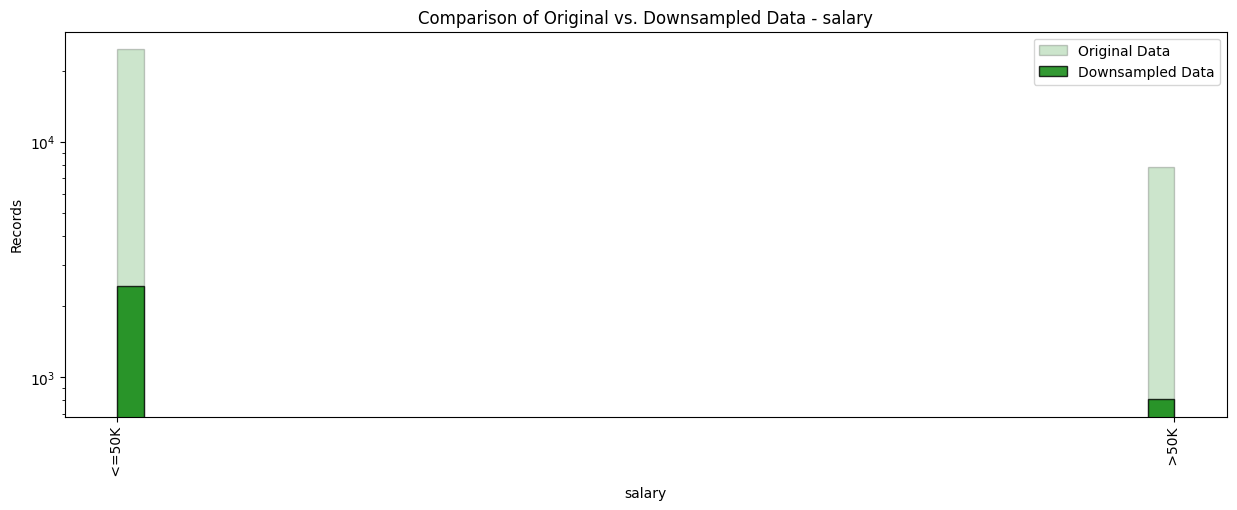

In [50]:


for column_name in data.columns:
      column_data = data[column_name]

      fig, ax = plt.subplots(figsize=(15, 5))
      plt.xticks(rotation='vertical')


      # Plot histograms for both datasets
      ax.hist(data[column_name], bins=40, alpha=0.2, label='Original Data', color='green', edgecolor='black',log=True)
      ax.hist(df['DS_'+column_name], bins=40, alpha=0.8, label='Downsampled Data', color='green', edgecolor='black',log=True)


      # Add labels and a legend
      ax.set_xlabel(column_name)
      ax.set_ylabel('Records')
      ax.set_title('Comparison of Original vs. Downsampled Data - '+ column_name )
      ax.legend()


      # Display the plot
      plt.show()


In [51]:
correlation_original = data.corr()
correlation_downsampled = df.corr()

print("Correlação no Original:")
print(correlation_original)

print("\nCorrelação no Downsampled:")
print(correlation_downsampled)

Correlação no Original:
                     age  education-num  capital-gain  capital-loss  \
age             1.000000       0.036527      0.077674      0.057775   
education-num   0.036527       1.000000      0.122630      0.079923   
capital-gain    0.077674       0.122630      1.000000     -0.031615   
capital-loss    0.057775       0.079923     -0.031615      1.000000   
hours-per-week  0.068756       0.148123      0.078409      0.054256   

                hours-per-week  
age                   0.068756  
education-num         0.148123  
capital-gain          0.078409  
capital-loss          0.054256  
hours-per-week        1.000000  

Correlação no Downsampled:
                     DS_age  DS_education-num  DS_capital-gain  \
DS_age             1.000000          0.015679         0.071855   
DS_education-num   0.015679          1.000000         0.112833   
DS_capital-gain    0.071855          0.112833         1.000000   
DS_capital-loss    0.057695          0.078659        -0.033

<ipython-input-51-e3a87d603f3c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-51-e3a87d603f3c>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [52]:

from scipy.stats import entropy

# Calculate entropy
original_entropy = entropy(np.bincount(data['age']))
downsampled_entropy = entropy(np.bincount(df['DS_age']))

print("Original Data Entropy:", original_entropy)
print("Downsampled Data Entropy:", downsampled_entropy)

Original Data Entropy: 3.9393802815724417
Downsampled Data Entropy: 3.9325717734635557


In [53]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [54]:
df.describe()

,DS_age,DS_education-num,DS_capital-gain,DS_capital-loss,DS_hours-per-week
count,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000
mean,38.884828,10.098894,1038.842138,98.237101,40.626843
std,13.545370,2.566364,7180.524260,423.222111,12.072943
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2547.000000,99.000000


<ipython-input-56-d220e1b8418e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-56-d220e1b8418e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



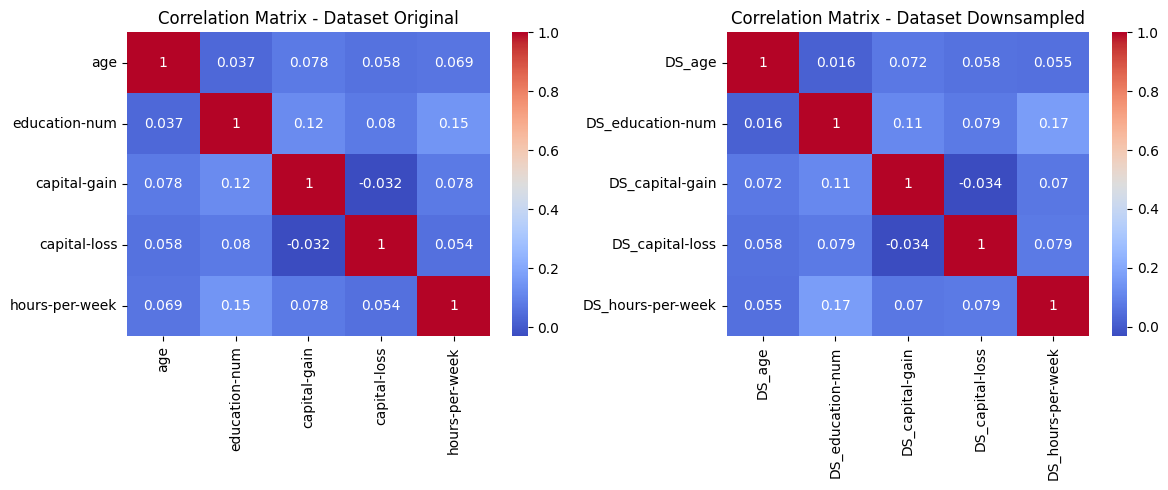

In [56]:
correlation_matrix1 = data.corr()
correlation_matrix2 = df.corr()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix - Dataset Original')

sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix - Dataset Downsampled')

plt.tight_layout()
plt.show()